# **菊安酱与菜菜的Python机器学习可视化**

## <font color='bule'>第2期 偏差图：14面积图

### 14/50 面积图

面积图就是通过对轴和线之间的区域进行着色形成的一种图形。    
它不仅可以强调峰值与低谷，还可以强调高点和低点的持续时间，持续时间越长，面积就越大。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E9%9D%A2%E7%A7%AF%E5%9B%BE.png" align="center" width=600/>

横坐标：时间（月份）<br>
纵坐标：月度收益率<br>
颜色：>0显示绿色，<0显示红色    
注释：收益率最高的点

### 1. 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#如果是jupyter notebook则需要运行这句代码，把生成的png图片嵌入到cell中
#如果是jupyter lab则可以不用运行这句代码，它会自动将生成图片嵌入到cell中

### 2. 认识绘制面积图的函数

#### **plt.fill_between**  

> 函数功能：   
>> 填充两条水平曲线之间区域 

> 重要参数说明：  
>> x: 定义曲线的x坐标   
>> y1: 定义第一条曲线的y坐标  
>> y2: 定义第二条曲线的y坐标    
>> where: 定义被填充的区域   
>> interpolate: 控制交叉点位置的填充（仅在设定where并且两条曲线相交的时候起作用）

官网参数说明：https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html

In [2]:
plt.fill_between?

Signature:
plt.fill_between(
    ['x', 'y1', 'y2=0', 'where=None', 'interpolate=False', 'step=None', '*', 'data=None', '**kwargs'],
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
creates one or multiple polygons describing the filled area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly. Use *step* if
the filling should be a step function, i.e. constant in between *x*.


Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, optional, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional, default: None
    Define *where* to exclude some horizontal regions from being
    filled. The filled regions

### 3.绘制简单面积填充图

In [3]:
#生成随机数
x = np.random.randn(1000)
x.sort()

In [4]:
x[:10]

array([-3.87246984, -3.63096045, -2.8263562 , -2.73207248, -2.71320714,
       -2.70740912, -2.65644291, -2.64747407, -2.58681355, -2.42880138])

In [5]:
y1 = np.sin(x)
y2 = np.cos(x)

In [6]:
y1[:10]

array([ 0.66752303,  0.47006798, -0.31004128, -0.39816922, -0.41540275,
       -0.42066983, -0.46634083, -0.47425585, -0.52675555, -0.65394803])

In [7]:
y2[:10]

array([-0.74458915, -0.88263021, -0.9507231 , -0.91731198, -0.9096376 ,
       -0.90721381, -0.88460513, -0.88038707, -0.85001682, -0.75653948])

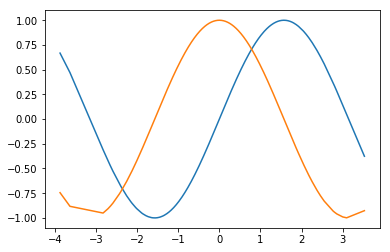

In [8]:
#绘制简单线形图
plt.plot(x,y1)
plt.plot(x,y2);

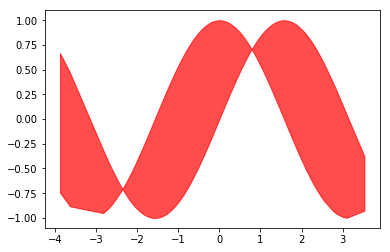

In [9]:
#填充两条曲线之间的区域
plt.fill_between(x,y1,y2,color='r',alpha=.7);

从图中可以发现：两曲线之间的区域全部被填充成一种颜色

增加难度：y1>y2的时候，填充红色，否则填充蓝色

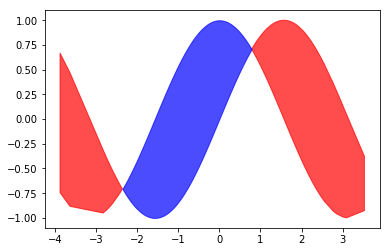

In [10]:
#y1>y2时，填充红色，否则填充蓝色
plt.fill_between(x,y1,y2,where=y1>y2,color='r',alpha=.7,interpolate=True)
plt.fill_between(x,y1,y2,where=y1<=y2,color='b',alpha=.7,interpolate=True);

#注意：interpolate=True表示将计算实际交叉点并将填充区域扩展到此点

#### 如果想要sin(x)>0填充红色，否则填充蓝色，该怎么操作呢？

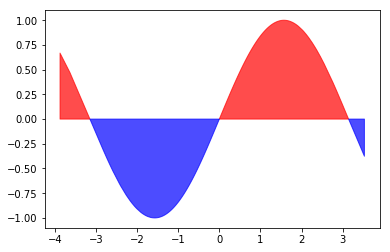

In [11]:
plt.fill_between(x,y1,0,where=y1>0,color='r',alpha=.7,interpolate=True)
plt.fill_between(x,y1,0,where=y1<=0,color='b',alpha=.7,interpolate=True);

### 4.认识绘图数据集

该数据集来自美国经济时间序列数据，是R中的内置数据集，用来练习

In [12]:
#导入数据集
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv",parse_dates=['date'])

#parse_dates的作用是将字符串序列转换为日期序列

In [13]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
date        574 non-null datetime64[ns]
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 27.0 KB


In [15]:
df.shape

(574, 6)

#### **将字符串本文转换为日期型文本**

In [16]:
df1 = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
date        574 non-null object
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 27.0+ KB


方法一：pd.to_datetime()

In [18]:
pd.to_datetime(df1.date)

0     1967-07-01
1     1967-08-01
2     1967-09-01
3     1967-10-01
4     1967-11-01
5     1967-12-01
6     1968-01-01
7     1968-02-01
8     1968-03-01
9     1968-04-01
10    1968-05-01
11    1968-06-01
12    1968-07-01
13    1968-08-01
14    1968-09-01
15    1968-10-01
16    1968-11-01
17    1968-12-01
18    1969-01-01
19    1969-02-01
20    1969-03-01
21    1969-04-01
22    1969-05-01
23    1969-06-01
24    1969-07-01
25    1969-08-01
26    1969-09-01
27    1969-10-01
28    1969-11-01
29    1969-12-01
         ...    
544   2012-11-01
545   2012-12-01
546   2013-01-01
547   2013-02-01
548   2013-03-01
549   2013-04-01
550   2013-05-01
551   2013-06-01
552   2013-07-01
553   2013-08-01
554   2013-09-01
555   2013-10-01
556   2013-11-01
557   2013-12-01
558   2014-01-01
559   2014-02-01
560   2014-03-01
561   2014-04-01
562   2014-05-01
563   2014-06-01
564   2014-07-01
565   2014-08-01
566   2014-09-01
567   2014-10-01
568   2014-11-01
569   2014-12-01
570   2015-01-01
571   2015-02-

In [19]:
df1['date1']=pd.to_datetime(df1.date)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
date        574 non-null object
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
date1       574 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 31.5+ KB


方法二：datetime.datetime.strptime()

In [21]:
import datetime

In [26]:
datetime.datetime.strptime('2019-1-1','%Y-%m-%d')

datetime.datetime(2019, 1, 1, 0, 0)

In [27]:
print(datetime.datetime.strptime('2019-1-1','%Y-%m-%d'))

2019-01-01 00:00:00


In [28]:
df1['date2'] = df1['date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
date        574 non-null object
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
date1       574 non-null datetime64[ns]
date2       574 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 36.0+ KB


In [30]:
df.columns

Index(['date', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy'], dtype='object')

In [31]:
df.head(2)

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945


In [33]:
name = ['日期','个人消费支出','总人口','个人储蓄率','失业时长中位数','失业人数']

#pce: personal consumption expenditures（ in billions of dollars）个人消费支出
#pop: total population（in thousands）总人口
#psavert: personal savings rate（in month）个人储蓄率
#uempmed：median duration of unemployment（in weeks）失业时长中位数
#unemploy:number of unemployed（in thousands）失业人数

In [34]:
[*zip(df.columns,name)]

[('date', '日期'),
 ('pce', '个人消费支出'),
 ('pop', '总人口'),
 ('psavert', '个人储蓄率'),
 ('uempmed', '失业时长中位数'),
 ('unemploy', '失业人数')]

#### 准备绘图所需数据

绘制目标图形，我们需要的是月度收益率，纵观所有特征，与月度收益率有关的特征是个人储蓄率（psavert）   
而且数据比较多，这里选取前100用来绘图   

In [35]:
df = df[:100]

In [36]:
df.shape

(100, 6)

In [37]:
#提取目标特征
df.psavert.values

array([12.5, 12.5, 11.7, 12.5, 12.5, 12.1, 11.7, 12.2, 11.6, 12.2, 12. ,
       11.6, 10.6, 10.4, 10.4, 10.6, 10.4, 10.9, 10. ,  9.4,  9.9,  9.5,
       10. , 10.9, 11.7, 11.5, 11.5, 11.3, 11.5, 11.7, 11.7, 11.6, 12.3,
       13.3, 12.3, 11.7, 13.2, 13.1, 12.9, 13. , 13.3, 12.9, 13.1, 13.1,
       13.3, 13. , 13.4, 14.4, 13.6, 13.6, 12.9, 13. , 12.8, 12.9, 12.4,
       12.6, 11.5, 11.3, 11.5, 11.4, 11.4, 11.8, 12. , 12.7, 13.4, 13.4,
       12.1, 12.2, 12.4, 12.8, 12.8, 13.2, 12.8, 13.6, 12.8, 14. , 14. ,
       14.4, 14. , 13.8, 13. , 12.7, 12.3, 12.5, 12.7, 11.6, 12.3, 13. ,
       13.4, 13.6, 12.8, 12.1, 12.3, 13.9, 17. , 13.9, 12.3, 12.6, 12.6,
       13. ])

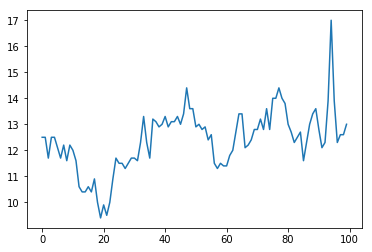

In [38]:
plt.plot(df.psavert.values);

In [39]:
df.psavert.diff()

0     NaN
1     0.0
2    -0.8
3     0.8
4     0.0
5    -0.4
6    -0.4
7     0.5
8    -0.6
9     0.6
10   -0.2
11   -0.4
12   -1.0
13   -0.2
14    0.0
15    0.2
16   -0.2
17    0.5
18   -0.9
19   -0.6
20    0.5
21   -0.4
22    0.5
23    0.9
24    0.8
25   -0.2
26    0.0
27   -0.2
28    0.2
29    0.2
     ... 
70    0.0
71    0.4
72   -0.4
73    0.8
74   -0.8
75    1.2
76    0.0
77    0.4
78   -0.4
79   -0.2
80   -0.8
81   -0.3
82   -0.4
83    0.2
84    0.2
85   -1.1
86    0.7
87    0.7
88    0.4
89    0.2
90   -0.8
91   -0.7
92    0.2
93    1.6
94    3.1
95   -3.1
96   -1.6
97    0.3
98    0.0
99    0.4
Name: psavert, Length: 100, dtype: float64

In [40]:
#计算收益（本身-前）
income = df.psavert.diff().fillna(0) 

In [46]:
# 计算月度收益率（收益/本金 = (本身-前)/前）
re = (income/df.psavert.shift(1)).fillna(0)*100

In [47]:
re

0      0.000000
1      0.000000
2     -6.400000
3      6.837607
4      0.000000
5     -3.200000
6     -3.305785
7      4.273504
8     -4.918033
9      5.172414
10    -1.639344
11    -3.333333
12    -8.620690
13    -1.886792
14     0.000000
15     1.923077
16    -1.886792
17     4.807692
18    -8.256881
19    -6.000000
20     5.319149
21    -4.040404
22     5.263158
23     9.000000
24     7.339450
25    -1.709402
26     0.000000
27    -1.739130
28     1.769912
29     1.739130
        ...    
70     0.000000
71     3.125000
72    -3.030303
73     6.250000
74    -5.882353
75     9.375000
76     0.000000
77     2.857143
78    -2.777778
79    -1.428571
80    -5.797101
81    -2.307692
82    -3.149606
83     1.626016
84     1.600000
85    -8.661417
86     6.034483
87     5.691057
88     3.076923
89     1.492537
90    -5.882353
91    -5.468750
92     1.652893
93    13.008130
94    22.302158
95   -18.235294
96   -11.510791
97     2.439024
98     0.000000
99     3.174603
Name: psavert, Length: 1

### 5.绘制目标图形

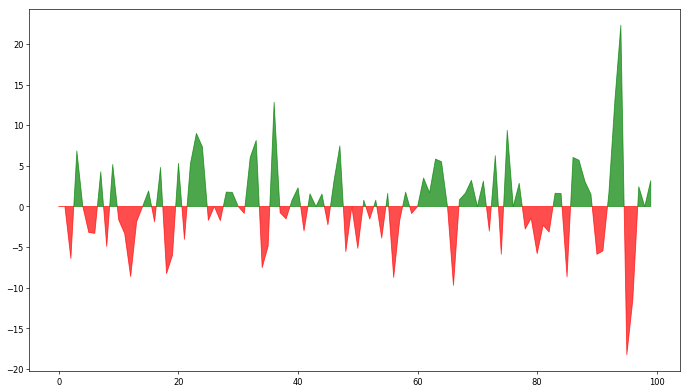

In [49]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7);

#### 修改横坐标刻度

In [50]:
#提取年份
y = df.date.dt.year

In [51]:
y

0     1967
1     1967
2     1967
3     1967
4     1967
5     1967
6     1968
7     1968
8     1968
9     1968
10    1968
11    1968
12    1968
13    1968
14    1968
15    1968
16    1968
17    1968
18    1969
19    1969
20    1969
21    1969
22    1969
23    1969
24    1969
25    1969
26    1969
27    1969
28    1969
29    1969
      ... 
70    1973
71    1973
72    1973
73    1973
74    1973
75    1973
76    1973
77    1973
78    1974
79    1974
80    1974
81    1974
82    1974
83    1974
84    1974
85    1974
86    1974
87    1974
88    1974
89    1974
90    1975
91    1975
92    1975
93    1975
94    1975
95    1975
96    1975
97    1975
98    1975
99    1975
Name: date, Length: 100, dtype: int64

In [52]:
#提取月份,并且显示英文名字
m = df.date.dt.month_name()

In [53]:
m

0          July
1        August
2     September
3       October
4      November
5      December
6       January
7      February
8         March
9         April
10          May
11         June
12         July
13       August
14    September
15      October
16     November
17     December
18      January
19     February
20        March
21        April
22          May
23         June
24         July
25       August
26    September
27      October
28     November
29     December
        ...    
70          May
71         June
72         July
73       August
74    September
75      October
76     November
77     December
78      January
79     February
80        March
81        April
82          May
83         June
84         July
85       August
86    September
87      October
88     November
89     December
90      January
91     February
92        March
93        April
94          May
95         June
96         July
97       August
98    September
99      October
Name: date, Length: 100,

In [54]:
#将年份和月份打包
[*zip(y,m)]

[(1967, 'July'),
 (1967, 'August'),
 (1967, 'September'),
 (1967, 'October'),
 (1967, 'November'),
 (1967, 'December'),
 (1968, 'January'),
 (1968, 'February'),
 (1968, 'March'),
 (1968, 'April'),
 (1968, 'May'),
 (1968, 'June'),
 (1968, 'July'),
 (1968, 'August'),
 (1968, 'September'),
 (1968, 'October'),
 (1968, 'November'),
 (1968, 'December'),
 (1969, 'January'),
 (1969, 'February'),
 (1969, 'March'),
 (1969, 'April'),
 (1969, 'May'),
 (1969, 'June'),
 (1969, 'July'),
 (1969, 'August'),
 (1969, 'September'),
 (1969, 'October'),
 (1969, 'November'),
 (1969, 'December'),
 (1970, 'January'),
 (1970, 'February'),
 (1970, 'March'),
 (1970, 'April'),
 (1970, 'May'),
 (1970, 'June'),
 (1970, 'July'),
 (1970, 'August'),
 (1970, 'September'),
 (1970, 'October'),
 (1970, 'November'),
 (1970, 'December'),
 (1971, 'January'),
 (1971, 'February'),
 (1971, 'March'),
 (1971, 'April'),
 (1971, 'May'),
 (1971, 'June'),
 (1971, 'July'),
 (1971, 'August'),
 (1971, 'September'),
 (1971, 'October'),
 (

In [56]:
str(m[1])[:3].upper()

'AUG'

In [58]:
#将月份和年份组合成‘JUL-1967’形式
[str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]

['JUL-1967',
 'JAN-1968',
 'JUL-1968',
 'JAN-1969',
 'JUL-1969',
 'JAN-1970',
 'JUL-1970',
 'JAN-1971',
 'JUL-1971',
 'JAN-1972',
 'JUL-1972',
 'JAN-1973',
 'JUL-1973',
 'JAN-1974',
 'JUL-1974',
 'JAN-1975',
 'JUL-1975']

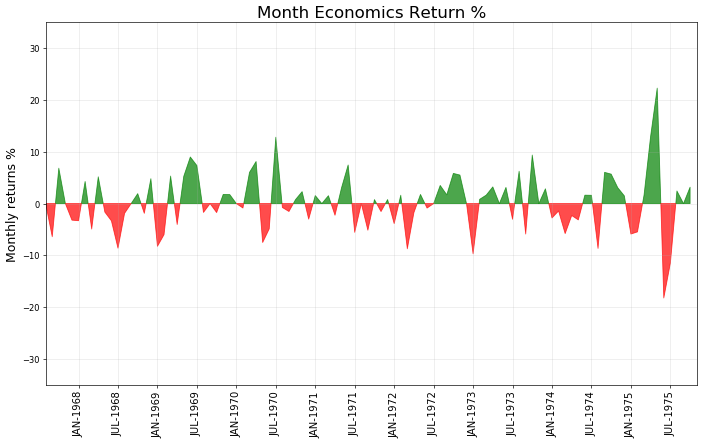

In [66]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7)

#修改横坐标刻度
xtickslabel = [str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6],xtickslabel,rotation=90,fontsize=12)

#添加装饰
plt.title('Month Economics Return %',fontsize=20)
plt.ylabel('Monthly returns %',fontsize=15)
plt.ylim(-35,35)
plt.xlim(1,100)
plt.grid(alpha=.3);

#### 添加注释

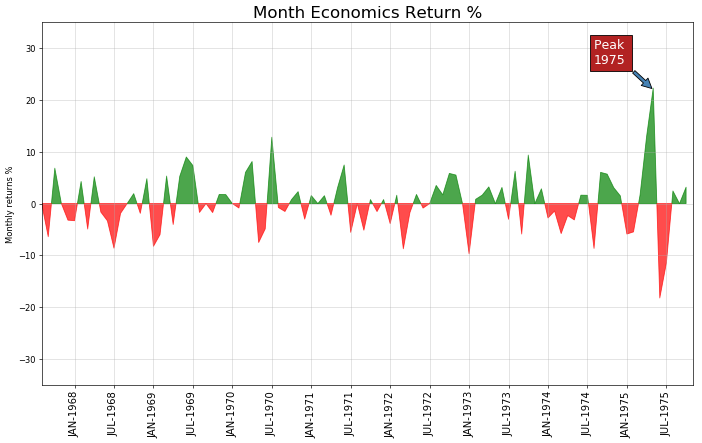

In [71]:
#创建画布并设定画布尺寸
plt.figure(figsize=(14,8),dpi=60)

#绘制面积图
plt.fill_between(range(df.shape[0]),re,0,where=re>0,color='g',interpolate=True, alpha=0.7)
plt.fill_between(range(df.shape[0]),re,0,where=re<=0,color='r',interpolate=True, alpha=0.7)

#添加注释
plt.annotate('Peak \n1975',xy=(94,22),xytext=(85,27)
             ,color='w',fontsize=15
             ,bbox=dict(boxstyle='square',fc='firebrick')
             ,arrowprops=dict(fc='steelblue',shrink=0.05)) 

#添加装饰
plt.title('Month Economics Return %',fontsize=20)
plt.ylabel('Monthly returns %')
#修改横坐标刻度
xticks = [str(m)[:3].upper()+'-'+str(y) for y,m in zip(y,m)][::6]
plt.xticks(range(df.shape[0])[::6],xticks,rotation=90,fontsize=12)
plt.ylim(-35,35)
plt.xlim(1,100)
plt.grid(alpha=.5);

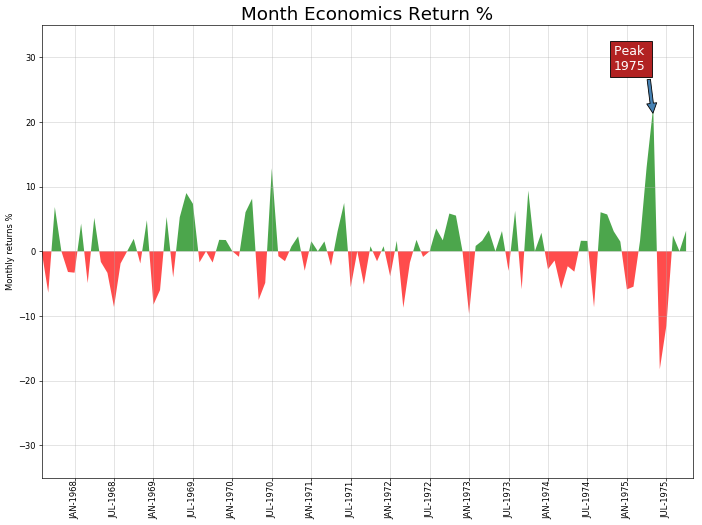

In [73]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100) #导入数据集并且保留前100行
x = np.arange(df.shape[0]) #生成一个与数据相同长度的序列
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100 #生成绘制图形的目标数据

# Plot
plt.figure(figsize=(14,10), dpi= 60) #创建画布并设定画布大小
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7) #大于0的部分填充为绿色
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7) #小于0的部分填充为红色

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white') #添加注释


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())] #生成X轴标签
plt.gca().set_xticks(x[::6]) #获取当前子图并设定子图的x刻度（每隔6隔保留一个）
#获取当前子图并设定X轴的刻度标签
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35) #设定Y轴的最大最小值
plt.xlim(1,100) #设定X轴的最大最小值
plt.title("Month Economics Return %", fontsize=22) #添加标题
plt.ylabel('Monthly returns %') #添加Y轴标签
plt.grid(alpha=0.5) #配置网格线
plt.show() #本地显示图形

### 6.图像解读